# Spectrometer

In this activity you will build and characterize a spectrometer. You will need:

* Adjustable slit
* Camera
* Lens
* Rotation stage
* Grating

Set up the slit on a post. The lens should be placed so the slit is at its focal length. The grating should be attached to the camera. The camera should be mounted on a post, on top of the the rotation stage.


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import math

In [10]:
def capture():
    
    cap = cv2.VideoCapture(0)
    #cap.set(cv2.CAP_PROP_EXPOSURE,20)
    frame = None
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Display the resulting frame
        cv2.imshow('OpenCV Capture. Press q to exit',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    return frame

## Task 1: Set up the camera

Placing a bright light beyond the slit. Focus the lens so that image of the slit is sharp. Rotate camera so that the image of the slit is close to the left hand side of the image. 

In [7]:
frame = capture()

## Task 2: Set up the spectrometer

Since the lens is focussed on the slit, light from the slit will be collimated as it hits the grating. Without the grating, the lens in the camera, which is focused on infinity, would form an image of the slit. The effect of the grating is to produce a separate set of parallel beams for each wavelength of light in the source. Each of these parallel beams leave the grating at a different angle, and so the camera lens focuses each of them to a different point on the camerea sensor.

The purpose of the spectrometer is to obtain the relative intensity of the light at each wavelength. We need to:
1. Know what point on the camera sensor corresponds to what angle the light entered the camera at.
2. Know at what wavelength left the grating at what angle.
In order to calculate 1. You need to know the field of view of your camera, from this you can convert horizontal pixel number into angle.
To calculate 2 you need to know the grating equation:
$m\lambda = a(\sin \theta_i + \sin \theta_m)$
Where $\theta_i$ is the angle of incidence of the light hitting the grating, $\theta_m$ is the angle light of wavelength $\lambda$ leaves the grating and m is the "order number".

We would like to form an equation $\theta_m = Ci$ where C is a constant i is the pixel number. Using the informaiton from above try to calculate the constant C.

You can measure $\theta_i$ from your rotation stage.

In [34]:
C = 65 * math.pi/180 / 640
theta_i = math.pi/6
a = 1/600

You will need the following two functions to process your data:

In [43]:
# Find the slit. This function finds the location of the slit in the photograph of the spectrum
# The function takes a single line of the data and scans it to find the maximum value.
# If it finds a block of saturated pixels it finds the middle pixel to be the slit.
# The function returns the column number of the slit.

def find_slit(data):
    
    mx = 0
    mxc = 0
    
    startslit = 0
    endslit = 0
    
    for c,d in enumerate(data):
        
        if d > mx:
            
            mx = d
            mxc = c
            
        if startslit == 0 and d >= 255:
            
            startslit = c
            
        if endslit == 0 and startslit > 0 and d < 254:
            
            endslit = c
            break
            
    # We found a slit of saturated values
    if startslit > 0 and endslit > startslit:
        
        return math.ceil(0.5 * (endslit - startslit) + startslit)
    
    # Or just return the location of the biggest value found
    else:
        
        return mxc
    
# This function takes a line from your image and converts it to produce wavelength data
    

def get_spectrum(data,lines_per_mm,C):
    #
    s = find_slit(data)
    
    d2 = data[s::]  # Select the data after the slit

    a = 0.001 / lines_per_mm # convert lines/mm into grating spacing in m
    
    wvl = [ 1e9 * a * ( math.sin(i * C)) for i in range(len(d2))]
        
    return (wvl,d2)

The procedure for taking a spectrum is this:
First capture the image from the camera and convert to greyscale

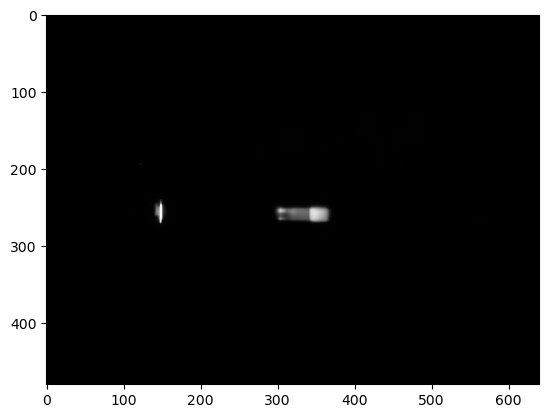

In [37]:
#Capture the image
img1 = capture()
#Convert to greyscale
img1grey = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#Show the image
plt.imshow(img1grey,cmap='gray')

Then take a line of the data. You will have to work out from your image which line to take. You should select a line that runs horizontally through the center of the spectrum. You will then use the function to convert the pixel index to wavelength using the "C" value you calculated

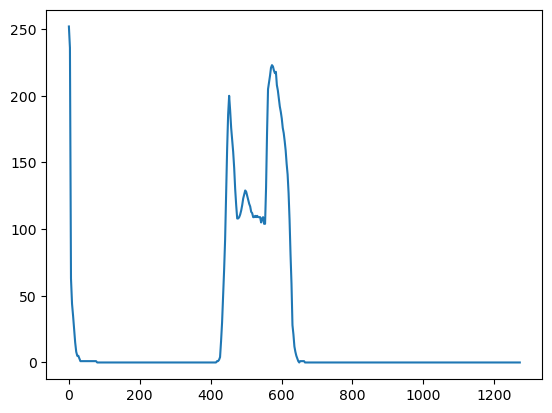

In [44]:
# Take a line from the image
spec = img1grey[255] # Replace 555 with the image line you want to use for your spectrum
# Produce a wavelength range and intensity data
wvl, intensity = get_spectrum(spec,600,C)
# Plot the spectrum
plt.plot(wvl,intensity)

## Task 2:
Take spectra using different sources: a white LED, colored LEDs, laser, gas discharge lamp and incandescent bulb. In each case determine the _free spectral range_ of the spectrum.

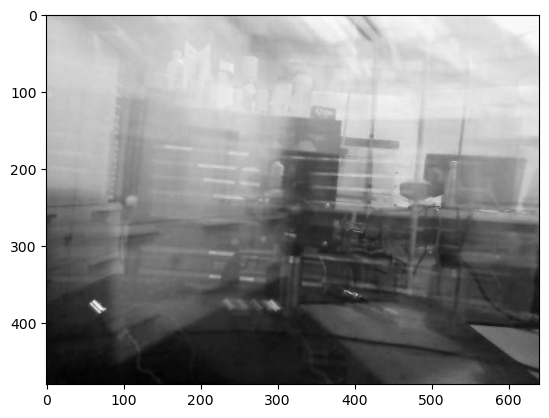

In [48]:
#Capture the image
img2 = capture()
#Convert to greyscale
img2grey = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Show the image
plt.imshow(img2grey,cmap='gray')

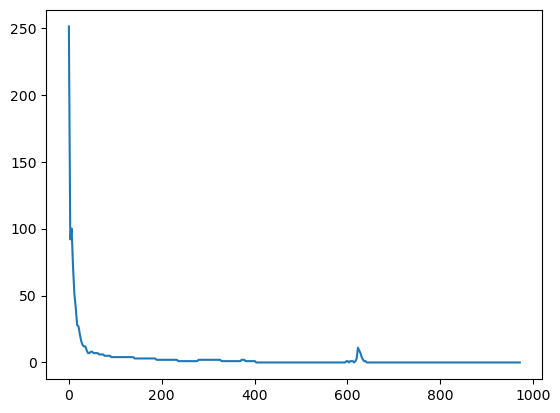

In [47]:
# Take a line from the image
spec2 = img2grey[250] # Replace 555 with the image line you want to use for your spectrum
# Produce a wavelength range and intensity data
wvl2, intensity2 = get_spectrum(spec2,600,C)
# Plot the spectrum
plt.plot(wvl2,intensity2)

## Task 3:
Finally work out the optical resolution of your spectrometer. Compare this with the angular resolution of your camera. Which limits the overall resolution of the system?
